In [11]:
from classy import *

In [12]:
d={}
for i in range(10):
    d['%d' % i]='data/simple_digits/%d.png' % i

images=image.load_images_from_filepatterns(**d)
images.target_names=[int(_) for _ in images.target_names]

[1]: 1 files found
	data/simple_digits/1.png
[0]: 1 files found
	data/simple_digits/0.png
[3]: 1 files found
	data/simple_digits/3.png
[2]: 1 files found
	data/simple_digits/2.png
[5]: 1 files found
	data/simple_digits/5.png
[4]: 1 files found
	data/simple_digits/4.png
[7]: 1 files found
	data/simple_digits/7.png
[6]: 1 files found
	data/simple_digits/6.png
[9]: 1 files found
	data/simple_digits/9.png
[8]: 1 files found
	data/simple_digits/8.png


In [13]:
images.data[0].shape

(16, 12)

In [28]:
data=image.images_to_vectors(images)

10 vectors of length 192
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p187', 'p188', 'p189', 'p190', 'p191'  (192 features)
Target values given.
Target names: '1', '0', '3', '2', '5', '4', '7', '6', '9', '8'
Mean:  [   8.5   23.    54.5   95.2  128.1  142.3  140.   127.5  101.1   65.5
   31.2   14.1   18.5   45.3   98.3  152.4  190.4  205.3  201.3  187.4
  162.3  116.6   61.9   28.2   41.3   84.7  151.3  197.4  214.9  214.5
  206.8  204.4  206.   176.4  106.7   54.5   67.8  117.7  173.1  177.7
  152.9  129.   119.8  135.   175.3  190.9  137.3   79.8   87.   136.7
  168.9  131.7   80.7   55.6   51.6   71.4  128.   175.6  145.3   92.6
   89.4  136.6  155.   104.2   56.4   46.2   52.9   70.7  118.5  162.9
  136.8   87.6   79.8  123.1  143.6  109.3   83.8   90.3  106.   123.1
  151.8  167.4  125.1   75.2   69.   108.   136.8  128.3  127.3  146.3
  166.9  179.9  191.9  180.9  119.6   65.9   60.1   93.6  121.   121.1
  131.1  152.   170.1  179.7  189.   181.2  122.2   67.7   54.8  

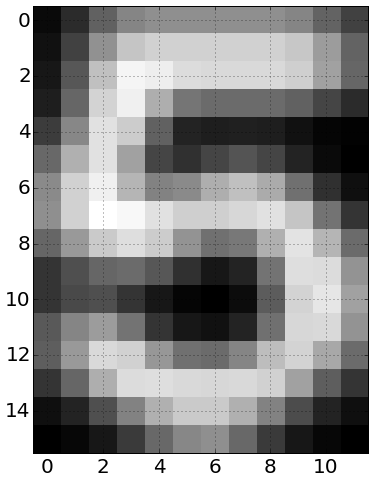

In [29]:
image.vector_to_image(data.vectors[4,:],(16,12))

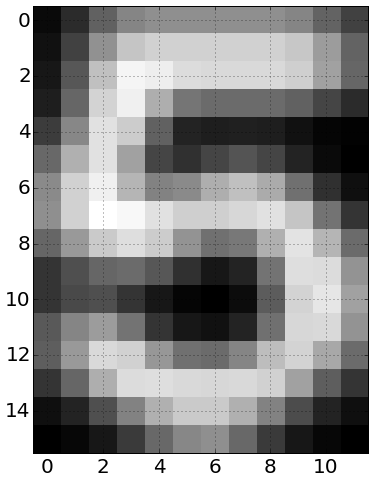

In [30]:
data.vectors-=data.vectors.mean()
data.vectors/=data.vectors.std()
image.vector_to_image(data.vectors[4,:],(16,12))

In [31]:
C=Perceptron()

In [32]:
timeit(reset=True)
C.fit(data.vectors,data.targets)
print "Training time: ",timeit()

Time Reset
Training time:  0.00301694869995 seconds 


In [33]:
print "On Training Set:",C.percent_correct(data.vectors,data.targets)

On Training Set: 100.0


In [34]:
C.weights

array([[ 0.52325708,  0.02392036, -0.86775236, ...,  0.7491475 ,
         1.20092835,  1.34359598],
       [ 1.36737392,  1.2603732 ,  1.39115186, ..., -0.19008109,
         0.03580933,  0.52325708],
       [ 2.7109699 ,  2.56830227,  2.11652142, ...,  2.11652142,
         2.56830227,  2.7109699 ],
       ..., 
       [ 2.61585815,  2.38996772,  1.70040749, ...,  2.282967  ,
         2.56830227,  2.63963609],
       [ 2.7109699 ,  2.69908093,  2.48507948, ...,  0.44017671,
         1.86685306,  2.54452433],
       [ 2.66341402,  2.5564133 ,  2.30674494, ...,  2.30674494,
         2.5564133 ,  2.66341402]])

In [35]:
C.weights.shape

(10, 192)

In [36]:
C.output(data.vectors[2,:])

array([[-184.97340115,  -56.01515276,   12.31381412,  -43.15215314,
        -107.4092933 ,  -76.86832101, -188.07952812, -164.7581164 ,
        -116.31275241,  -36.83694461]])

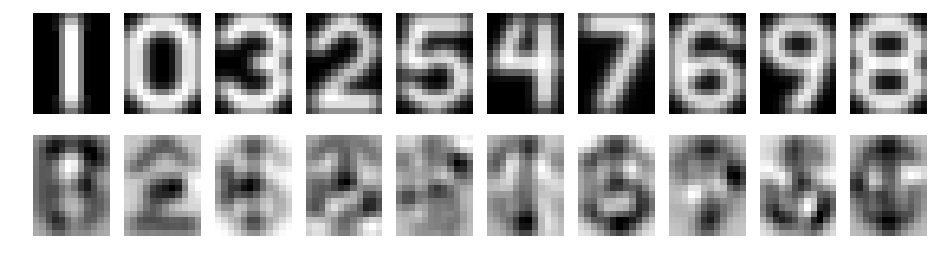

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,4))
for i in range(10):
    plt.subplot(2,10,i+1)
    image.vector_to_image(data.vectors[i,:],(16,12))
    plt.axis('off')
    
    plt.subplot(2,10,i+11)
    image.vector_to_image(C.weights[i,:],(16,12))
    plt.axis('off')
    

In [38]:
data.targets

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [39]:
data.vectors.shape

(10, 192)

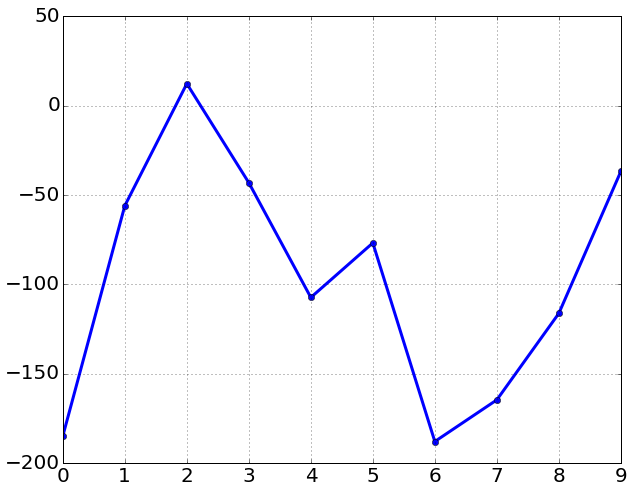

In [40]:
plt.plot(C.output(data.vectors[2,:]).ravel(),'-o')

In [41]:
C.output(data.vectors[2,:]).shape

(1, 10)